In [173]:
import pandas as pd
data = pd.read_csv('HPQ.csv', parse_dates=['Date'], index_col=['Date'])
data[:5]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02,0.047654,0.047654,0.045078,0.045078,2480333,0.0,0.0
1962-01-03,0.045078,0.045078,0.044112,0.044595,507341,0.0,0.0
1962-01-04,0.044595,0.046044,0.042824,0.043629,845568,0.0,0.0
1962-01-05,0.043468,0.043468,0.042664,0.042664,338227,0.0,0.0
1962-01-08,0.042664,0.043308,0.041858,0.043308,873754,0.0,0.0


In [174]:
df = data['Close']
df[:5]

Date
1962-01-02    0.045078
1962-01-03    0.044595
1962-01-04    0.043629
1962-01-05    0.042664
1962-01-08    0.043308
Name: Close, dtype: float64

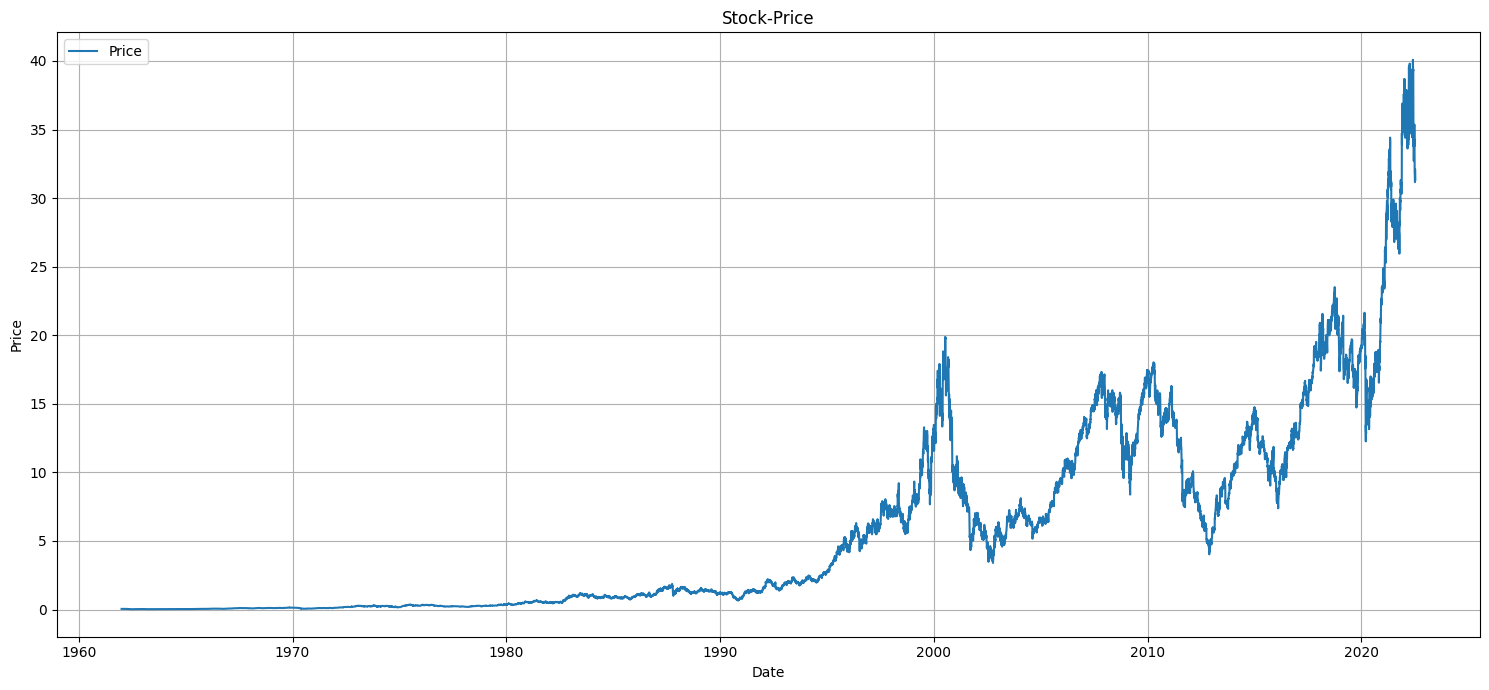

In [175]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.grid()
plt.plot(df.index, df, '-', label='Price')
plt.title('Stock-Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

In [176]:
import tensorflow as tf
dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=df[:-30],
    targets=df[30:],
    shuffle=False,
    sequence_length=30,
    batch_size=len(df)
)

In [177]:
import numpy as np
for batch in dataset:
    windows, labels = batch
    assert np.array_equal(windows[0], df[:30])
    assert np.array_equal(labels[0], df[30])
    break

In [178]:
len(windows), len(labels)

(15177, 15177)

In [179]:
windows[:3]

<tf.Tensor: shape=(3, 30), dtype=float64, numpy=
array([[0.0450783 , 0.04459515, 0.04362916, 0.04266353, 0.04330754,
        0.04395115, 0.04427315, 0.04411232, 0.04379032, 0.04314636,
        0.04266353, 0.04250235, 0.04234151, 0.04475633, 0.0450783 ,
        0.04443433, 0.04379032, 0.04379032, 0.04379032, 0.04282435,
        0.04330754, 0.04395115, 0.04330754, 0.04330754, 0.04282435,
        0.04298552, 0.04201956, 0.04185837, 0.04218035, 0.04250235],
       [0.04459515, 0.04362916, 0.04266353, 0.04330754, 0.04395115,
        0.04427315, 0.04411232, 0.04379032, 0.04314636, 0.04266353,
        0.04250235, 0.04234151, 0.04475633, 0.0450783 , 0.04443433,
        0.04379032, 0.04379032, 0.04379032, 0.04282435, 0.04330754,
        0.04395115, 0.04330754, 0.04330754, 0.04282435, 0.04298552,
        0.04201956, 0.04185837, 0.04218035, 0.04250235, 0.04153637],
       [0.04362916, 0.04266353, 0.04330754, 0.04395115, 0.04427315,
        0.04411232, 0.04379032, 0.04314636, 0.04266353, 0.0425023

In [180]:
labels[:3]

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.04153637, 0.04121441, 0.04040957])>

In [181]:
split = int(0.8 * len(windows))
x_train = windows[:split]
x_test = windows[split:]
y_train = labels[:split]
y_test = labels[split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(12141, 12141, 3036, 3036)

In [189]:
train_index = df.index[30:len(y_train)+30]
len(train_index), train_index.shape

(12141, (12141,))

In [197]:
test_index = df.index[len(y_train)+59:]
len(test_index)

3036

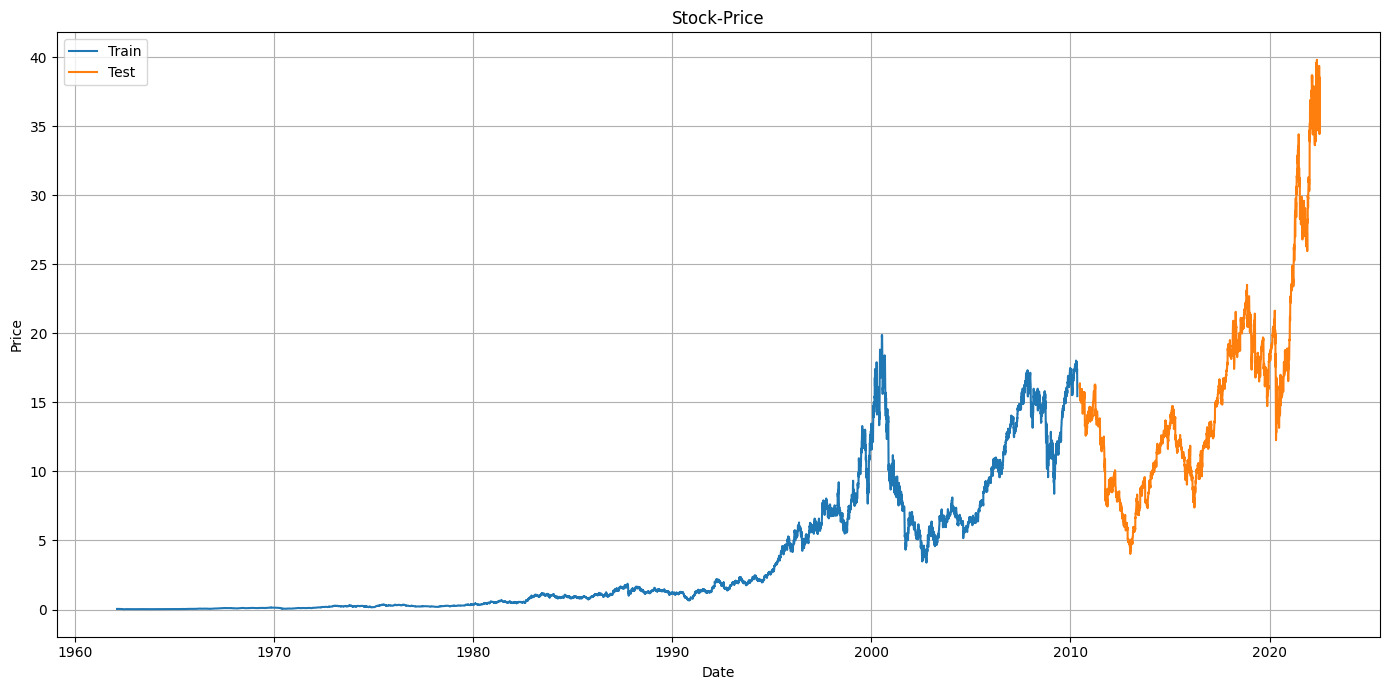

In [198]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.grid()
plt.plot(train_index, y_train, '-', label='Train')
plt.plot(test_index, y_test, '-', label='Test')
plt.title('Stock-Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

In [206]:
from keras import layers
model = tf.keras.models.Sequential()
model.add(layers.Input(shape=(30,)))
model.add(layers.Lambda(lambda x:tf.expand_dims(x, axis=1)))
model.add(layers.LSTM(16, activation='relu'))
model.add(layers.Dense(1))

model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mae']
)

model.fit(
    x=x_train,
    y=y_train,
    epochs=50,
    validation_data=(x_test, y_test)
)

Epoch 1/50
380/380 [==============================] - 1s 1ms/step - loss: 0.1550 - mae: 0.1861 - val_loss: 0.6917 - val_mae: 0.5814
Epoch 2/50
380/380 [==============================] - 0s 1ms/step - loss: 0.0783 - mae: 0.1364 - val_loss: 0.7630 - val_mae: 0.6258
Epoch 3/50
380/380 [==============================] - 0s 1ms/step - loss: 0.0701 - mae: 0.1257 - val_loss: 0.5220 - val_mae: 0.4677
Epoch 4/50
380/380 [==============================] - 0s 1ms/step - loss: 0.0607 - mae: 0.1158 - val_loss: 0.4618 - val_mae: 0.4444
Epoch 5/50
380/380 [==============================] - 0s 1ms/step - loss: 0.0521 - mae: 0.1069 - val_loss: 0.3713 - val_mae: 0.3941
Epoch 6/50
380/380 [==============================] - 0s 1ms/step - loss: 0.0488 - mae: 0.1012 - val_loss: 0.4480 - val_mae: 0.4591
Epoch 7/50
380/380 [==============================] - 0s 1ms/step - loss: 0.0460 - mae: 0.0989 - val_loss: 0.4574 - val_mae: 0.4452
Epoch 8/50
380/380 [==============================] - 0s 1ms/step - loss: 0.

In [218]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_3 (Lambda)           (None, 1, 30)             0         
                                                                 
 lstm_6 (LSTM)               (None, 16)                3008      
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,025
Trainable params: 3,025
Non-trainable params: 0
_________________________________________________________________


In [231]:
future_days = 100
last_result = [x_test[-1]]

In [234]:
prediction = model.predict(x_test)
prediction

95/95 [==============================] - 0s 573us/step


array([[15.51786  ],
       [15.789375 ],
       [15.7310915],
       ...,
       [34.202545 ],
       [34.70451  ],
       [35.857964 ]], dtype=float32)

In [235]:
y_test

<tf.Tensor: shape=(3036,), dtype=float64, numpy=
array([16.23420143, 16.00937271, 16.38629913, ..., 35.34498596,
       36.53739548, 38.50487137])>

In [236]:
len(prediction), len(y_test)

(3036, 3036)

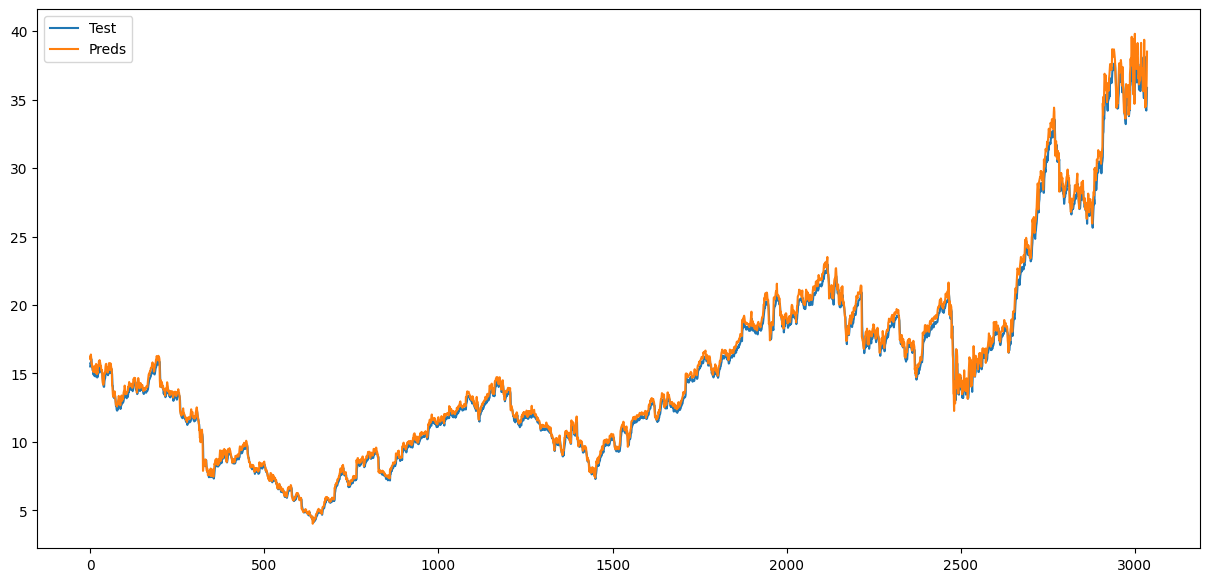

In [238]:
plt.figure(figsize=(15, 7))
plt.plot(prediction, '-', label="Test")
plt.plot(y_test, '-', label='Preds')
plt.legend()
plt.show()

In [244]:
from sklearn.metrics import f1_score
score = tf.metrics.mean_squared_error(tf.cast(y_test, tf.float32), tf.cast(prediction, tf.float32))
tf.reduce_mean(score).numpy()

105.27806

In [246]:
last_result = x_test[-1]
last_result

<tf.Tensor: shape=(30,), dtype=float64, numpy=
array([37.23297119, 38.18689728, 38.44524765, 39.13088608, 38.0477829 ,
       36.55727005, 36.76594162, 36.11011505, 36.21942139, 37.34227371,
       36.39828491, 36.82556534, 37.68011856, 39.14082336, 37.67018509,
       36.85537338, 36.77587509, 37.30252838, 35.63315201, 35.61328125,
       36.54733276, 37.27271271, 39.36936569, 36.61688995, 35.50397491,
       34.43080902, 34.83821487, 34.55004883, 35.34498596, 36.53739548])>

In [252]:
last_result = tf.expand_dims(x_test[-1], axis=0)
model.predict(last_result)

1/1 [==============================] - 0s 12ms/step


array([[35.85797]], dtype=float32)

In [257]:
future_days = 100
future_predictions = []
last_result = x_test[-1]
for day in range(future_days):
    future_pred = model.predict(tf.expand_dims(last_result, axis=0))
    future_predictions.append(tf.squeeze(future_pred).numpy())
    last_result = np.append(last_result, future_pred)
    last_result = last_result[1:]

future_predictions

1/1 [==============================] - 0s 12ms/step


[35.85797,
 35.053417,
 34.71122,
 34.694077,
 34.516083,
 34.39488,
 34.060463,
 33.38176,
 33.085423,
 33.150364,
 32.61476,
 32.147427,
 31.68968,
 32.04602,
 31.737255,
 31.266155,
 30.984413,
 30.349102,
 29.713816,
 29.485537,
 28.96881,
 28.623096,
 28.098372,
 27.604357,
 26.949816,
 26.485353,
 26.137856,
 25.505495,
 24.817354,
 24.27607,
 23.960245,
 23.437422,
 23.040163,
 22.565823,
 22.105486,
 21.721394,
 21.310406,
 20.771938,
 20.330814,
 19.931917,
 19.67472,
 19.28924,
 18.884575,
 18.555113,
 18.147982,
 17.754251,
 17.466413,
 17.158115,
 16.834873,
 16.527056,
 16.183197,
 15.917646,
 15.657348,
 15.402863,
 15.094536,
 14.781917,
 14.518611,
 14.307496,
 14.026214,
 13.790558,
 13.566542,
 13.335609,
 13.128874,
 12.900195,
 12.661992,
 12.455407,
 12.253589,
 12.069572,
 11.88355,
 11.683403,
 11.515622,
 11.321831,
 11.137652,
 10.985817,
 10.827345,
 10.655294,
 10.498368,
 10.333326,
 10.196044,
 10.059486,
 9.915557,
 9.775743,
 9.633436,
 9.503725,
 9.38471

In [258]:
len(future_predictions)

100

In [260]:
start_data = df.index[-1]
start_data

Timestamp('2022-07-12 00:00:00')

In [261]:
start_data = start_data + np.timedelta64(1, 'D')
end_data = start_data + np.timedelta64(100, 'D')
future_index = np.arange(start_data, end_data, dtype='datetime64[D]')
future_index

array(['2022-07-13', '2022-07-14', '2022-07-15', '2022-07-16',
       '2022-07-17', '2022-07-18', '2022-07-19', '2022-07-20',
       '2022-07-21', '2022-07-22', '2022-07-23', '2022-07-24',
       '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28',
       '2022-07-29', '2022-07-30', '2022-07-31', '2022-08-01',
       '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05',
       '2022-08-06', '2022-08-07', '2022-08-08', '2022-08-09',
       '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-13',
       '2022-08-14', '2022-08-15', '2022-08-16', '2022-08-17',
       '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21',
       '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
       '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
       '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02',
       '2022-09-03', '2022-09-04', '2022-09-05', '2022-09-06',
       '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10',
       '2022-09-11', '2022-09-12', '2022-09-13', '2022-

In [264]:
len(future_index)

100

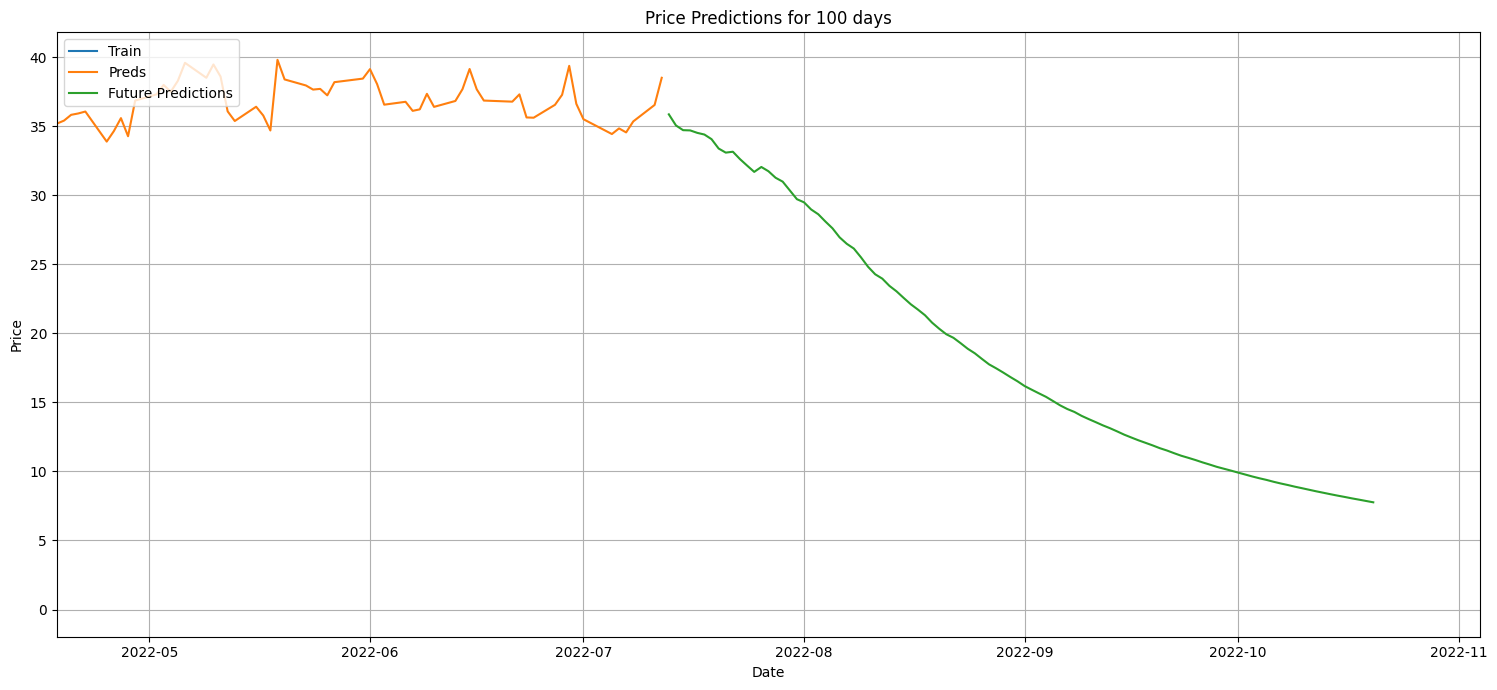

In [286]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.plot(train_index, y_train, '-', label="Train")
plt.plot(test_index, y_test,'-', label='Preds')
plt.plot(future_index, future_predictions, '-', label='Future Predictions')
plt.title('Price Predictions for 100 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.tight_layout()
plt.xlim([19100, 19300])
plt.show()

In [278]:
len(df)

15236